# Скрытые цепи Маркова - Рабинер

Рассматривается применение модификации метода Л.Рабинера для решения задачи идентификации цепей Маркова (ЦМ) на предмет принадлежности с заданной вероятностью к определенному подклассу автоматной марковской модели (АММ). Модели, заданной на основе стохастических матриц класса эргодических, которые и определяют подкласс АММ. Особенность ЦМ – наличие подмножеств допустимых реализаций в множестве состояний в каждый момент времени

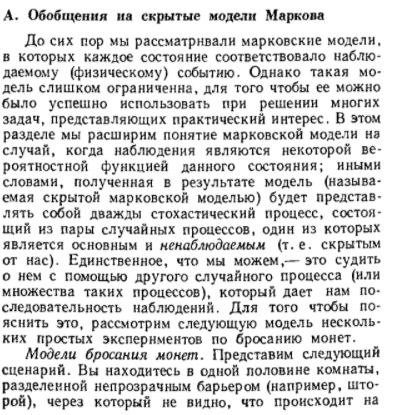

Этапы эксперимента:

* генерация подклассов матриц ТВ, ТН, БП, БЛ q=4
* генерация подклассов k=q^b
* генерация последовательностей 5 последовательностей B=5
* функция расчета вектора a (метод рабинера)
* формирование датасета b^k векторов

In [2]:
import quantecon as qe
import numpy as np
import pandas as pd

In [3]:
tv = np.array([[0.25, 0.25, 0.25, 0.25], 
      [1/3,   1/3,  1/3,  0], 
      [0.5,   0.5,   0,   0],
      [0.5,   0,     0,   0.5]])

tn = np.array( [[0.5,  0,     0,    0.5], 
      [0,    0,     0.5,  0.5],
      [0,    1/3,   1/3,  1/3],
      [0.25, 0.25, 0.25, 0.25]])

bp =  np.array( [[0,      0,    0.5,   0.5],
                [0,      0,     0.5,   0.5],
                [0.5,    0.5,   0,    0], 
                [0.5,    0.5,   0,    0]])

bl =   np.array([[0.5,    0.5, 0,    0], 
      [0.5,    0.5,  0,    0],
      [0,      0,    0.5,   0.5],
      [0,      0,    0.5,   0.5]])

In [8]:
# zip - на вход функции передаются последовательности
# zip() возвращает итератор с кортежами, в котором n-ый кортеж состоит из n-ых элементов последовательностей, которые были переданы как аргументы
# например, десятый кортеж будет содержать десятый элемент каждой из переданных последовательностей
# если на вход были переданы последовательности разной длины, то все они будут отрезаны по самой короткой последовательности
# порядок элементов соблюдается
tvt=[*zip(*tv)]
tvt

[(0.25, 0.3333333333333333, 0.5, 0.5),
 (0.25, 0.3333333333333333, 0.5, 0.0),
 (0.25, 0.3333333333333333, 0.0, 0.0),
 (0.25, 0.0, 0.0, 0.5)]

In [9]:
tvt=np.array(tvt)
tvt

array([[0.25      , 0.33333333, 0.5       , 0.5       ],
       [0.25      , 0.33333333, 0.5       , 0.        ],
       [0.25      , 0.33333333, 0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.5       ]])

In [6]:
pi=[[1/4,    1/4,  1/4,    1/4]]
pi

[[0.25, 0.25, 0.25, 0.25]]

In [7]:
from itertools import *

In [10]:
#комбинации классов 
for i in combinations_with_replacement(['tv','tn','bp','pl'], 4):
    print(i, end=' ') # aa ab ac ad bb bc bd cc cd dd 

('tv', 'tv', 'tv', 'tv') ('tv', 'tv', 'tv', 'tn') ('tv', 'tv', 'tv', 'bp') ('tv', 'tv', 'tv', 'pl') ('tv', 'tv', 'tn', 'tn') ('tv', 'tv', 'tn', 'bp') ('tv', 'tv', 'tn', 'pl') ('tv', 'tv', 'bp', 'bp') ('tv', 'tv', 'bp', 'pl') ('tv', 'tv', 'pl', 'pl') ('tv', 'tn', 'tn', 'tn') ('tv', 'tn', 'tn', 'bp') ('tv', 'tn', 'tn', 'pl') ('tv', 'tn', 'bp', 'bp') ('tv', 'tn', 'bp', 'pl') ('tv', 'tn', 'pl', 'pl') ('tv', 'bp', 'bp', 'bp') ('tv', 'bp', 'bp', 'pl') ('tv', 'bp', 'pl', 'pl') ('tv', 'pl', 'pl', 'pl') ('tn', 'tn', 'tn', 'tn') ('tn', 'tn', 'tn', 'bp') ('tn', 'tn', 'tn', 'pl') ('tn', 'tn', 'bp', 'bp') ('tn', 'tn', 'bp', 'pl') ('tn', 'tn', 'pl', 'pl') ('tn', 'bp', 'bp', 'bp') ('tn', 'bp', 'bp', 'pl') ('tn', 'bp', 'pl', 'pl') ('tn', 'pl', 'pl', 'pl') ('bp', 'bp', 'bp', 'bp') ('bp', 'bp', 'bp', 'pl') ('bp', 'bp', 'pl', 'pl') ('bp', 'pl', 'pl', 'pl') ('pl', 'pl', 'pl', 'pl') 

In [11]:
mc1 = qe.MarkovChain(tv)

print(mc1)

<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.        ]
 [0.5        0.         0.         0.5       ]]>


In [17]:
#симулиция последовательности, длина 10
a1=mc1.simulate(10, random_state=None)
a2=mc1.simulate(10, random_state=None)
a3=mc1.simulate(10, random_state=None)
a4=mc1.simulate(10, random_state=None)
a5=mc1.simulate(10, random_state=None)
a6=mc1.simulate(10, random_state=None)
a7=mc1.simulate(10, random_state=None)
a8=mc1.simulate(10, random_state=None)
a9=mc1.simulate(10, random_state=None)
a10=mc1.simulate(10, random_state=None)

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10

(array([1, 2, 0, 1, 1, 2, 0, 3, 3, 3]),
 array([1, 2, 0, 0, 0, 1, 2, 0, 3, 3]),
 array([0, 3, 0, 0, 1, 2, 1, 2, 1, 2]),
 array([1, 0, 3, 3, 0, 3, 0, 3, 0, 2]),
 array([3, 3, 0, 1, 2, 0, 0, 2, 0, 0]),
 array([2, 1, 2, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 1, 0, 2, 1, 2]),
 array([3, 3, 3, 0, 0, 0, 3, 0, 1, 2]),
 array([2, 0, 1, 1, 0, 0, 1, 1, 0, 3]),
 array([1, 1, 2, 1, 1, 2, 1, 1, 1, 2]))

In [18]:
array=np.column_stack((a1, a2,a3,a4,a5,a6,a7,a8,a9,a10))
array

array([[1, 1, 0, 1, 3, 2, 0, 3, 2, 1],
       [2, 2, 3, 0, 3, 1, 0, 3, 0, 1],
       [0, 0, 0, 3, 0, 2, 1, 3, 1, 2],
       [1, 0, 0, 3, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 2, 0, 1, 0, 0, 1],
       [2, 1, 2, 3, 0, 1, 1, 0, 0, 2],
       [0, 2, 1, 0, 0, 0, 0, 3, 1, 1],
       [3, 0, 2, 3, 2, 0, 2, 0, 1, 1],
       [3, 3, 1, 0, 0, 1, 1, 1, 0, 1],
       [3, 3, 2, 2, 0, 1, 2, 2, 3, 2]])

In [19]:
df = pd.DataFrame(array)

df[0]=[2,0,1,0,3,3,0,2,1,1]
display(df.head(20))

,0,1,2,3,4,5,6,7,8,9
0,2,1,0,1,3,2,0,3,2,1
1,0,2,3,0,3,1,0,3,0,1
2,1,0,0,3,0,2,1,3,1,2
3,0,0,0,3,1,1,1,0,1,1
4,3,0,1,0,2,0,1,0,0,1
5,3,1,2,3,0,1,1,0,0,2
6,0,2,1,0,0,0,0,3,1,1
7,2,0,2,3,2,0,2,0,1,1
8,1,3,1,0,0,1,1,1,0,1
9,1,3,2,2,0,1,2,2,3,2


In [20]:
# Пусть ('tv', 'tn', 'tn', 'bp')

In [21]:
#Расчет вектора альфа методом Рабинера
alfa= np.zeros((10, 4))


alfa

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
beta=np.array([[0.0,0.0,0.0,0.0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0]])

beta

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [23]:
pi=np.array([1/4,    1/4,  1/4,    1/4])
pi

array([0.25, 0.25, 0.25, 0.25])

In [24]:
 df[0].iloc[1:]

1    0
2    1
3    0
4    3
5    3
6    0
7    2
8    1
9    1
Name: 0, dtype: int64

In [25]:
k=df.loc[0][0]    
k
pi[k]
alfa[0,2]=pi[k]
alfa

array([[0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ]])

In [26]:
tvt

array([[0.25      , 0.33333333, 0.5       , 0.5       ],
       [0.25      , 0.33333333, 0.5       , 0.        ],
       [0.25      , 0.33333333, 0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.5       ]])

In [27]:
alfa[0]

array([0.  , 0.  , 0.25, 0.  ])

In [28]:
ii=[0,1,2,3,4,5,6,7,8,9]
j=1
v=0
b=0
for d in ii:
    for b in ii:
        k=df.loc[b][d]  
        print(k)

2
0
1
0
3
3
0
2
1
1
1
2
0
0
0
1
2
0
3
3
0
3
0
0
1
2
1
2
1
2
1
0
3
3
0
3
0
3
0
2
3
3
0
1
2
0
0
2
0
0
2
1
2
1
0
1
0
0
1
1
0
0
1
1
1
1
0
2
1
2
3
3
3
0
0
0
3
0
1
2
2
0
1
1
0
0
1
1
0
3
1
1
2
1
1
2
1
1
1
2
